<a href="https://colab.research.google.com/github/hortenciadiniz/Atividades-Python-YouTube/blob/main/DFT_HD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cmath  # Importar a biblioteca para números complexos
import matplotlib.pyplot as plt

In [2]:
def dft(x):
    N = len(x)  # Tamanho da sequência de entrada
    X = np.zeros(N, dtype=complex)  # Inicializar o vetor de saída

    for k in range(N):
        X[k] = 0
        for n in range(N):
            # Cálculo da soma ponderada com a matriz de transformação de Fourier
            X[k] += x[n] * cmath.exp(-2j * np.pi * k * n / N)

    return X

In [3]:
frequencia1 = 1000  # Frequência da primeira senoide (em Hz)
frequencia2 = 2000  # Frequência da segunda senoide (em Hz)
amplitude1 = 1.0  # Amplitude da primeira senoide
amplitude2 = 0.6  # Amplitude da segunda senoide
duracao = 1.0  # Duração do sinal (em segundos)
taxa_amostragem = 8000  # Taxa de amostragem (em Hz)

# Crie um vetor de tempo de 0 a duracao com passos de 1/taxa_amostragem
tempo = np.arange(0, duracao, 1.0 / taxa_amostragem)

# Gere as senoides com as frequências e amplitudes especificadas
sinal1 = amplitude1 * np.sin(2 * np.pi * frequencia1 * tempo)
sinal2 = amplitude2 * np.sin(2 * np.pi * frequencia2 * tempo)

# Some as senoides para criar o sinal final
sinal_final = sinal1 + sinal2

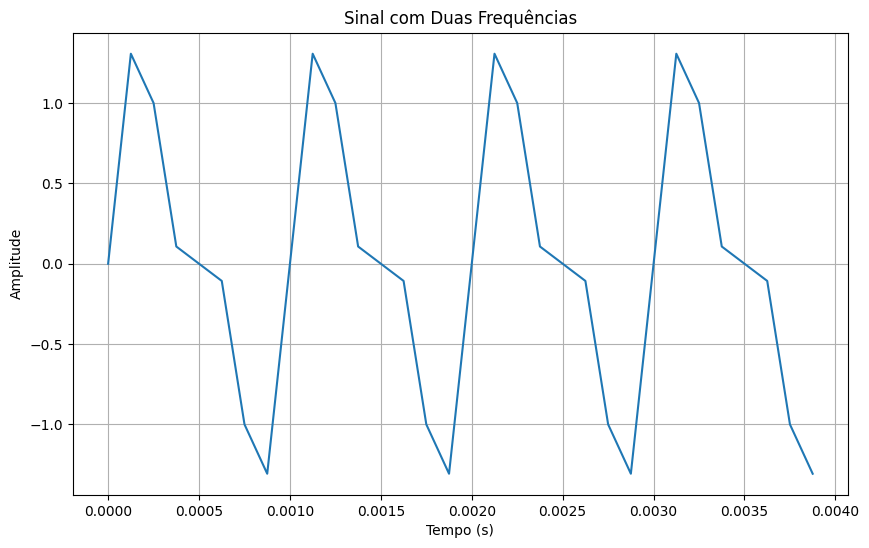

In [4]:
# Plote o sinal original
plt.figure(figsize=(10, 6))
plt.plot(tempo[:int(taxa_amostragem*0.004)], sinal_final[:int(taxa_amostragem*0.004)])
plt.title('Sinal com Duas Frequências')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [5]:
X = dft(sinal_final)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


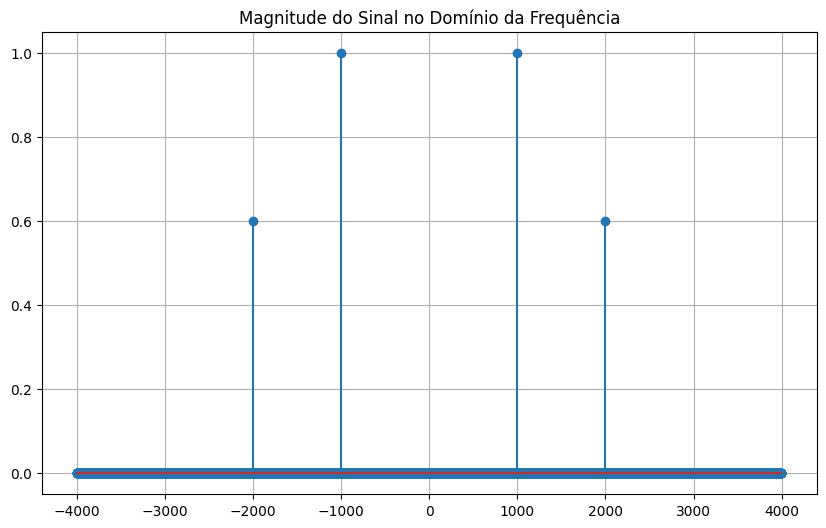

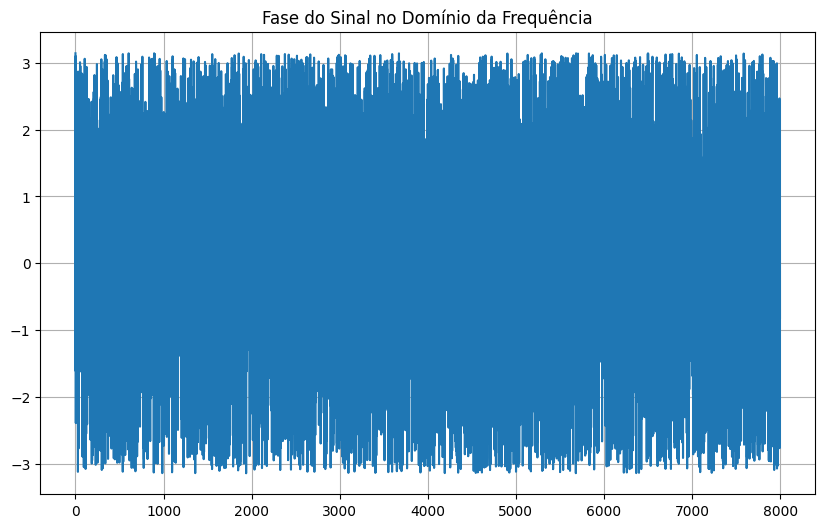

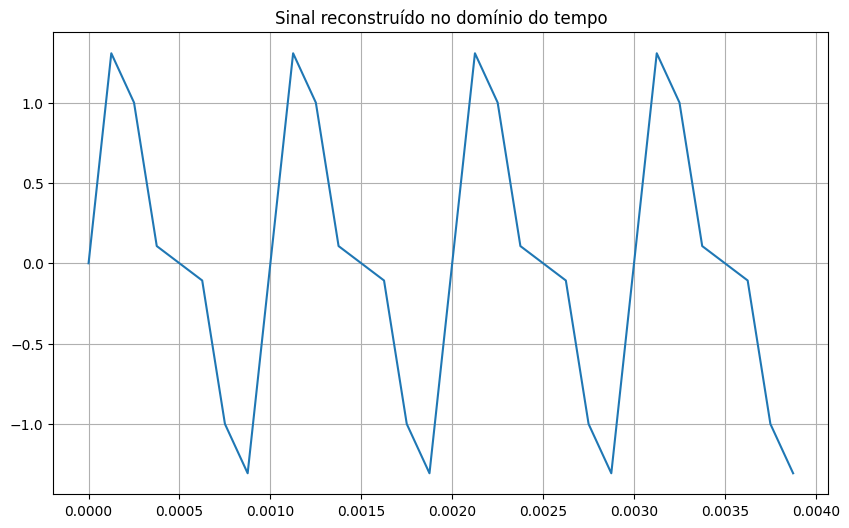

In [8]:
# Cria os vetores de frequência para os gráficos
freq_X = np.fft.fftfreq(len(X), 1/taxa_amostragem)

# Calcula a IFFT para reconstruir o sinal no domínio do tempo
x_reconstructed = np.fft.ifft(X)

# Plota a magnitude do sinal no domínio da frequência
escala = 1/4000
plt.figure(figsize=(10, 6))
plt.title('Magnitude do Sinal no Domínio da Frequência')
plt.stem(freq_X, escala*np.abs(X))
plt.grid(True)

# Plota a fase do sinal no domínio da frequência
plt.figure(figsize=(10, 6))
plt.title('Fase do Sinal no Domínio da Frequência')
plt.plot(np.angle(X))
plt.grid(True)

# Calcula a IFFT para reconstruir o sinal no domínio do tempo
plt.figure(figsize=(10, 6))
plt.title('Sinal reconstruído no domínio do tempo')
plt.plot(tempo[:int(taxa_amostragem*0.004)], x_reconstructed[:int(taxa_amostragem*0.004)])
plt.grid(True)

plt.show()

Tamanho da DFT (N = 2): Tempo médio = 0.000012 segundos
Tamanho da DFT (N = 4): Tempo médio = 0.000031 segundos
Tamanho da DFT (N = 8): Tempo médio = 0.000102 segundos
Tamanho da DFT (N = 16): Tempo médio = 0.000324 segundos
Tamanho da DFT (N = 32): Tempo médio = 0.000954 segundos
Tamanho da DFT (N = 64): Tempo médio = 0.003780 segundos
Tamanho da DFT (N = 128): Tempo médio = 0.015953 segundos
Tamanho da DFT (N = 256): Tempo médio = 0.058177 segundos
Tamanho da DFT (N = 512): Tempo médio = 0.246867 segundos
Tamanho da DFT (N = 1024): Tempo médio = 1.128764 segundos
Tamanho da DFT (N = 2048): Tempo médio = 4.420721 segundos


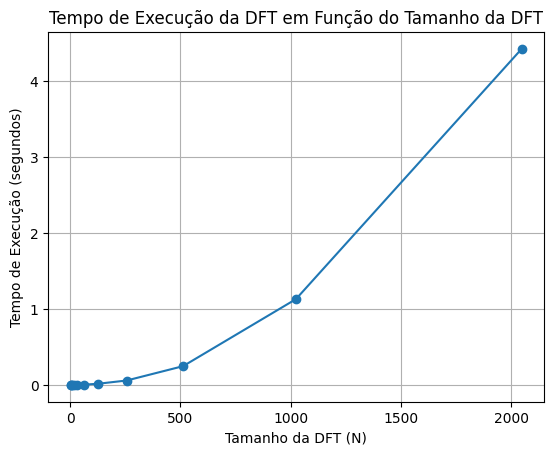

In [7]:
# Tamanhos da DFT que você deseja testar
sizes = [2**n for n in range(1, 12)]
execution_times = []

for N in sizes:
    x = np.random.rand(N) + 1j * np.random.rand(N)

    # Mede o tempo de execução
    import time
    start_time = time.time()
    for _ in range(10):  # Média de 10 execuções
        dft(x)
    end_time = time.time()

    execution_time = (end_time - start_time) / 10  # Tempo médio
    execution_times.append(execution_time)

    print(f'Tamanho da DFT (N = {N}): Tempo médio = {execution_time:.6f} segundos')

# Plotagem do gráfico

plt.plot(sizes, execution_times, marker='o')
plt.xlabel('Tamanho da DFT (N)')
plt.ylabel('Tempo de Execução (segundos)')
plt.title('Tempo de Execução da DFT em Função do Tamanho da DFT')
plt.grid(True)
plt.show()
